## 🏃‍♂️ <b>DESAFIO FINAL</b> 🤺
🏢 TREINA RECIFE  
👩‍🏫 REBECA VALQUEIRO  
🧑‍🎓 LÚCIO FLAVIO  
Neste desafio, vamos analisar a produtividade da cana-de-açúcar de uma cooperativa para ajudar na tomada de decisões.

### <b>Bibliotecas Necessárias para Realização das Análises</b>
<div class="alert alert-block alert-success">
* <b>PANDAS</b>  <br>
* <b>NUMPY</b>  <br>
* <b>MATPLOTLIB</b>  <br>
* <b>SCIPY</b>  <br>
* <b>SEABORN</b>
</div>

### Instalando as bibliotecas: Matplotlib, Seaborn e Scipy  
Usaremos o <b>pip</b> como gerenciador de pacotes para instalar as bibliotecas.

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\luciu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\luciu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [24]:
pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 25.1.1
[notice] To update, run: C:\Users\luciu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


### Importando as Bibliotecas Necessárias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 💻 Carregamento e Preparação dos dados

In [3]:
# Carregando o DataFrame
df = pd.read_csv("cana_de_acucar_produtividade.csv")

In [3]:
# Visualizando as cinco primeiras linhas
df.head()

,id_plantio,idade_muda_meses,fertilizante_kg_hectare,rendimento_ton_hectare,ph_solo,teor_sacarose_percent,regiao
0,1,2,100,85.5,6.5,14.2,Mata Norte
1,2,3,120,92.1,6.8,15.1,Mata Norte
2,3,2,110,88.0,6.6,14.5,Mata Norte
3,4,4,130,95.0,7.0,15.5,Mata Norte
4,5,3,115,90.5,6.7,14.8,Mata Norte


In [4]:
# Obtendo insformações do Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_plantio               30 non-null     int64  
 1   idade_muda_meses         30 non-null     int64  
 2   fertilizante_kg_hectare  30 non-null     int64  
 3   rendimento_ton_hectare   30 non-null     float64
 4   ph_solo                  30 non-null     float64
 5   teor_sacarose_percent    30 non-null     float64
 6   regiao                   30 non-null     object 
dtypes: float64(3), int64(3), object(1)
memory usage: 1.8+ KB


In [5]:
# Dimensão do Data Frame
df.shape

(30, 7)

🧠 <span style="color:blue"><b>Breve resumo dos dados:</b></span>  
O Data Frame a ser analisado possui 30 linhas non-null (não nulas) com sete colunas de atributos.  
Os atributos estão divididos em 3 colunas do tipo inteiro, 3 colunas do tipo float e uma coluna do tipo string.

In [6]:
# Nomes dos atributos
df.columns

Index(['id_plantio', 'idade_muda_meses', 'fertilizante_kg_hectare',
       'rendimento_ton_hectare', 'ph_solo', 'teor_sacarose_percent', 'regiao'],
      dtype='object')

In [4]:
# Carregando os atributos em variáveis
idade_muda, fertilize, rendimento = df['idade_muda_meses'], df['fertilizante_kg_hectare'], df['rendimento_ton_hectare']

### 🧮 Métricas de Tendência Central e Dispersão que usaremos nas análises  
Calcularemos  
<span style="color:blue"><b>Medidas de Tendência Central:</b></span>
* Média Aritmética  
* Mediana  
* Moda 

<span style="color:blue"><b>Medidas de Dispersão:</b></span>
* Variância  
* Desvio Padrão  
* Amplitude  
    <span style="color:red">A = lim(Max) - lim(min)</span>
* Quartis  
    <span style="color:red">25%, 50%, 75%</span>
* IIQ  
    <span style="color:red">IIQ = q3 - q1</span>

In [5]:
# Métricas das idades das mudas (A idade das mudas é dada em meses)
# Medidas de Tendências
media_idade = idade_muda.mean()
mediana_idade = idade_muda.median()
moda_idade = idade_muda.mode()
# Medidas de Dispersão
dp_idade = idade_muda.std(ddof=0)
var_idade = idade_muda.var(ddof=0)
amplit_idade = idade_muda.max() - idade_muda.min()
q1_idade = idade_muda.quantile(0.25)
q3_idade = idade_muda.quantile(0.75)
iiq_idade = q3_idade - q1_idade


# Métricas dos fertilizantes
# Tendências
media_fertilize = fertilize.mean()
mediana_fertilize = fertilize.median()
moda_fertilize = fertilize.mode()
# Dispersões
dp_fertilize = fertilize.std(ddof=0)
var_fertilize = fertilize.var(ddof=0)
amplit_fertilize = fertilize.max() - fertilize.min()
q1_fertilize = fertilize.quantile(0.25)
q3_fertilize = fertilize.quantile(0.75)
iiq_fertilize = q3_fertilize - q1_fertilize

# Métricas dobrendimento por hectares
# Tendências
media_rendimento = rendimento.mean()
mediana_rendimento = rendimento.median()
moda_rendimento = rendimento.mode()
# Dispersões
dp_rendimento = rendimento.std(ddof=0)
var_rendimento = rendimento.var(ddof=0)
amplit_rendimento = rendimento.max() - rendimento.min()
q1_rendimento = rendimento.quantile(0.25)
q3_rendimento = rendimento.quantile(0.75)
iiq_rendimento = q3_rendimento - q1_rendimento

print('=='*60)
print("Resumo Estatístico:")
print("IDADE DAS MUDAS")
print(f"A média das idades das mudas de cana-de-açúcar é {media_idade:.2f} meses")
print(f"A mediana é {mediana_idade:.2f} meses")
print(f"A frequência das idades é de {moda_idade}")
print(f"A varância populacional das idades é {var_idade}")
print(f"O desvio padrão populacional das idades é {dp_idade}")
print(f"A amplitude das idades é {amplit_idade}")
print(f"Primeiro quartil (25%): {q1_idade} e terceiro quartil (75%): {q3_idade}")
print(f"O intervalo inter quartil é {iiq_idade}")
print("")
print("Uso de Fertilizantes em Kg")
print(f"A média do uso de fertilizantes é {media_fertilize:.2f} Kg")
print(f"A mediana de fertilizantes é {mediana_fertilize:.2f} Kg")
print(f"A frequência do uso de fertilizantes é {moda_fertilize}")
print(f"A varância populacional dos fertilizantes é {var_fertilize}")
print(f"O desvio padrão populacional dos fertilizantes é {dp_fertilize}")
print(f"A amplitude dos dados dos fertilizantes é {amplit_fertilize}")
print(f"Primeiro quartil (25%): {q1_fertilize} e terceiro quartil (75%): {q3_fertilize}")
print(f"O intervalo inter quartil dos dados dos fertilizantes é {iiq_fertilize}")
print("")
print("Rendimento por Hectares")
print(f"A média do rendimento das mudas por hectares é {media_rendimento:.2f} Kg")
print(f"A mediana do rendimento é {mediana_rendimento:.2f} Kg")
print(f"A frequência do rendimento é {moda_rendimento}")
print(f"A varância populacional do rendimento é {var_rendimento}")
print(f"O desvio padrão populacional do rendimento é {dp_rendimento}")
print(f"A amplitude do rendimento é {amplit_rendimento} Kg")
print(f"Primeiro quartil (25%): {q1_rendimento} e terceiro quartil(75%): {q3_rendimento}")
print(f"O intervalo inter quartil é {iiq_rendimento}")

print('=='*60)


Resumo Estatístico:
IDADE DAS MUDAS
A média das idades das mudas de cana-de-açúcar é 3.23 meses
A mediana é 3.00 meses
A frequência das idades é de 0    2
1    3
Name: idade_muda_meses, dtype: int64
A varância populacional das idades é 1.0455555555555558
O desvio padrão populacional das idades é 1.0225241100118647
A amplitude das idades é 3
Primeiro quartil (25%): 2.0 e terceiro quartil (75%): 4.0
O intervalo inter quartil é 2.0

Uso de Fertilizantes em Kg
A média do uso de fertilizantes é 117.07 Kg
A mediana de fertilizantes é 116.00 Kg
A frequência do uso de fertilizantes é 0    100
Name: fertilizante_kg_hectare, dtype: int64
A varância populacional dos fertilizantes é 222.79555555555552
O desvio padrão populacional dos fertilizantes é 14.926337647110746
A amplitude dos dados dos fertilizantes é 50
Primeiro quartil (25%): 102.75 e terceiro quartil (75%): 128.75
O intervalo inter quartil dos dados dos fertilizantes é 26.0

Rendimento por Hectares
A média do rendimento das mudas por he

### 🧠 <b>Interpretação Sobre a Distribuição dos Dados</b>  
* <b>IDADES DAS MUDAS:</B>  
De acordo com as medidas de tendência central, podemos <b>*estimar*</b> que os dados possuem pouca <b>*variabilidade*</b>, pois a média e a mediana estão bem <b>*próximas*</b> e a moda está <b>*concentrada*</b> em 2 e 3 meses.  
As medidas de dispersão, reforçam que a maioria das mudas tem idades próximas de 3 meses, como vemos na <b>*baixa*</b> variância e desvio padrão. Os quartis e o IIQ, <b>*indicam*</b> que a distribuição dos dados está <b>*concentrada*</b> em torno da mediana, indicando mais uma vez a <b>*baixa dispersão*</b>.  
Logo podemos dizer que os dados estão mais <b>*homogênios*</b>.  

* <b>FERTILIZANTES:</b>  
A média e a mediana mais uma vez estão bem próximas, o que dá a impressão de uma distribuição assimétrica, mas quando olhamos para variância e o desvio padrão, percebemos significativamente a variação no uso dos fertilizantes pelos produtores.  
Ao olharmos os quartis e o intervalo interquartil, podemos perceber que 50% dos dados estão dentro de um intervalo de 26 Kg, ou seja, metade dos dados é agrupada, a outra metade tem uma variação considerálvel.  
<b>OBS: Não sabemos se as variações no uso dos fertilizantes é devido ao clima ou devido a diferentes práticas agrícolas.</b>  


* <b>RENDIMENTO POR HECTARES (em Kg)</b>  
Novamente vemos simetria na distribuição dos rendimentos, a variância e desvio padrão nos mostram baixa dispersão em relação à média, indicando que os rendimentos são consistentes.  
    Quando olhamos para os quartis e o intervalo interquartil, os dados nos mostram que a metade central dos rendimentos está dentro de um intervalo relativamente estreito, reafirmando uma boa consistência nos rendimentos.


In [16]:
df.head()

,id_plantio,idade_muda_meses,fertilizante_kg_hectare,rendimento_ton_hectare,ph_solo,teor_sacarose_percent,regiao
0,1,2,100,85.5,6.5,14.2,Mata Norte
1,2,3,120,92.1,6.8,15.1,Mata Norte
2,3,2,110,88.0,6.6,14.5,Mata Norte
3,4,4,130,95.0,7.0,15.5,Mata Norte
4,5,3,115,90.5,6.7,14.8,Mata Norte


### 🧮 <b>Calculando Média e Desvio Padrão do Rendimento por Hectares para cada Regiao (Mata Norte e Mata Sul).</b>

In [6]:
estatisticas_regiao = df.groupby('regiao')['rendimento_ton_hectare'].agg(['mean', 'std'])

estatisticas_regiao.round(2)

,mean,std
regiao,,
Mata Norte,91.05,4.44
Mata Sul,90.25,5.73


### 📊 <b>Gráfico de barras do rendimento médio por região. </b>

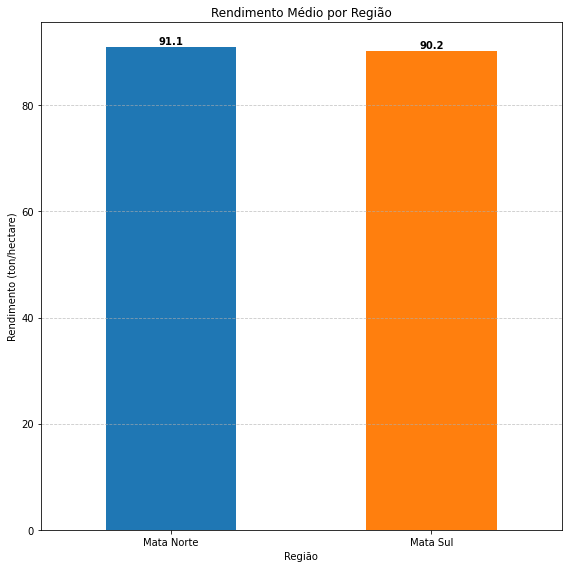

In [7]:
# Agrupando por região e calcular a média do rendimento
media_rendimento = df.groupby('regiao')['rendimento_ton_hectare'].mean()

plt.figure(figsize=(8,8))

media_rendimento.plot(kind='bar', color=['#1f77b4', '#ff7f0e'])

# Adicionar rótulos e título
plt.title('Rendimento Médio por Região')
plt.xlabel('Região')
plt.ylabel('Rendimento (ton/hectare)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir os valores nas barras
for i, valor in enumerate(media_rendimento):
    plt.text(i, valor + 0.5, f'{valor:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 📊 <b>Box plot do rendimento por regiao.</b>

C:\Users\luciu\AppData\Local\Temp\ipykernel_14132\2023336503.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='regiao', y='rendimento_ton_hectare', data=df, palette='Set2')


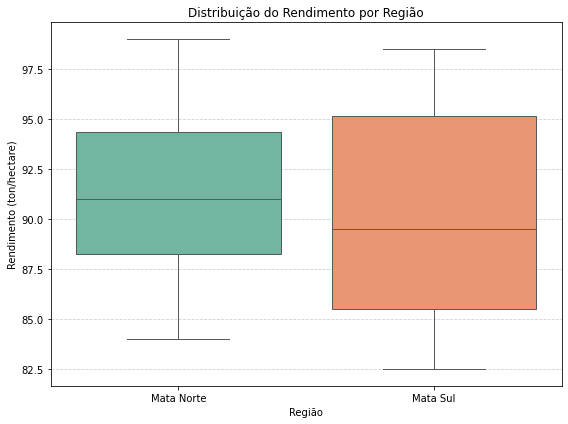

In [8]:
# Tamanho do gráfico
plt.figure(figsize=(8, 6))

# Box plot do rendimento por região
sns.boxplot(x='regiao', y='rendimento_ton_hectare', data=df, palette='Set2')

# Adicionar título e rótulos
plt.title('Distribuição do Rendimento por Região')
plt.xlabel('Região')
plt.ylabel('Rendimento (ton/hectare)')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### 🧠 Interpretação do Box Plot 
📊 <b>Mediana</b>   
A mediana da Mata Norte é maior que a da Mata Sul, isto indica que metade dos plantios na Mata Norte produzem mais em comparação com a Mata Sul.  
📦 <b>Dispersão dos Dados - IIQ:</b>  
A altura da caixa na Mata Sul, indica maior variabilidade no rendimento entre os plantios, mostrando que alguns rendem bem e outros não.  
📐 <b>Outliers</b>   
Não há outliers visíveis no box plot de nenhuma das regiões, indicando que os rendimentos estão relativamente distribuídos.  
📋 <b>Resumo Geral</b>   
A Mata Norte tem rendimento mais estável e levemente superior, enquanto a Mata Sul é mais variável, o que pode refletir diferenças no solo, clima, manejo agrícola ou aplicação de fertilizantes.

### 📊 Gráfico de Dispersão (scatterplot) do Rendimento vs. Fertilizante

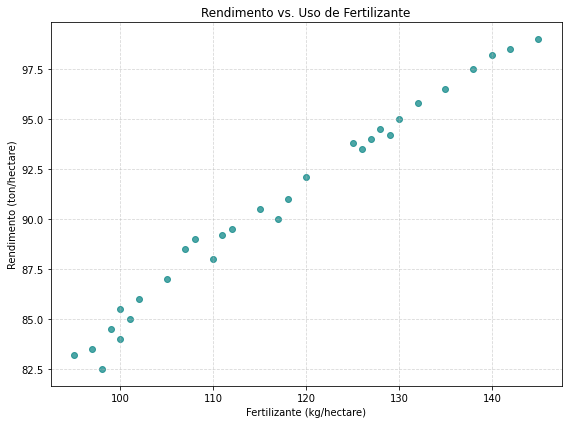

In [9]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df['fertilizante_kg_hectare'], df['rendimento_ton_hectare'], color='teal', alpha=0.7)

# Títulos e rótulos
plt.title('Rendimento vs. Uso de Fertilizante')
plt.xlabel('Fertilizante (kg/hectare)')
plt.ylabel('Rendimento (ton/hectare)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 📊 Gráfico de Dispersão do Rendimento vs. Idade das Mudas

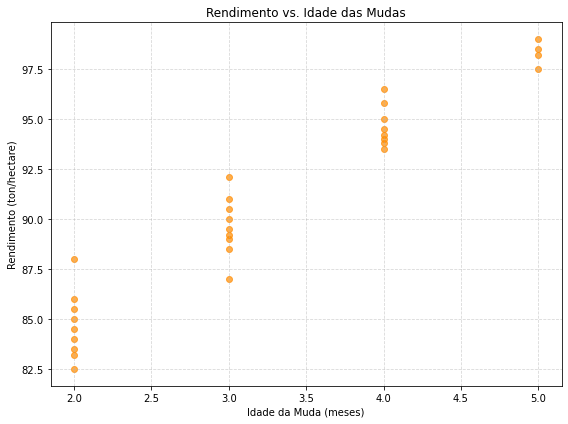

In [10]:
# Gráfico de dispersão: Rendimento vs Idade das mudas
plt.figure(figsize=(8, 6))
plt.scatter(df['idade_muda_meses'], df['rendimento_ton_hectare'], color='darkorange', alpha=0.7)

# Títulos e rótulos
plt.title('Rendimento vs. Idade das Mudas')
plt.xlabel('Idade da Muda (meses)')
plt.ylabel('Rendimento (ton/hectare)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### 🧠 Interpretação da Relação Observada em cada Gráfico (positiva, negativa, nula, força).

<b>Relação entre as variáveis:</b>  
* A relação é positiva: conforme a idade da muda aumenta, o rendimento tende a aumentar.  

* A tendência é bem definida: há uma distribuição crescente clara conforme a idade vai de 2 para 5 meses.  

* A relação aparenta ser forte: os pontos estão concentrados verticalmente por idade, e o rendimento sobe visivelmente de grupo para grupo.  

* Não há dispersão aleatória: a relação não é nula.  

### 🧮 Probabilidades e Intervalo de Confiança

In [11]:
# Total de observações
total = len(df)

# Contagem de casos com teor de sacarose > 15.0%
acima_15 = len(df[df['teor_sacarose_percent'] > 15.0])

# Probabilidade (proporção)
probabilidade = acima_15 / total

# Exibir resultado
print(f"Probabilidade de teor de sacarose > 15.0%: {probabilidade:.2%}")

Probabilidade de teor de sacarose > 15.0%: 40.00%


### 📌 Assumindo que o ph_solo segue uma distribuição normal, qual a probabilidade de um novo plantio ter um ph_solo entre 6.5 e 7.0? 

In [12]:
from scipy.stats import norm

# Calcular média e desvio padrão do pH
media_ph = df['ph_solo'].mean()
desvio_ph = df['ph_solo'].std()

# Calcular probabilidades acumuladas
p_7 = norm.cdf(7.0, loc=media_ph, scale=desvio_ph)
p_65 = norm.cdf(6.5, loc=media_ph, scale=desvio_ph)

# Probabilidade entre 6.5 e 7.0
probabilidade = p_7 - p_65

# Exibir resultado
print(f"Probabilidade de pH entre 6.5 e 7.0: {probabilidade:.2%}")

Probabilidade de pH entre 6.5 e 7.0: 65.48%


<b>Probabilidade de pH entre 6.5 e 7.0: 65.48%</b>

### 🧮 Calculando o intervalo de confiança de 95% para a média do rendimento por hectares de todos os plantios, usando os dados da amostra.

In [13]:
# Parâmetros da amostra
media = df['rendimento_ton_hectare'].mean()
desvio = df['rendimento_ton_hectare'].std(ddof=1)  # amostral
n = len(df)

# Nível de confiança de 95%
z = 1.96

# Erro padrão da média
erro_padrao = desvio / np.sqrt(n)

# Intervalo de confiança
limite_inferior = media - z * erro_padrao
limite_superior = media + z * erro_padrao

# Resultado
print(f"Intervalo de confiança de 95% para a média do rendimento:")
print(f"({limite_inferior:.2f}, {limite_superior:.2f}) toneladas/hectare")

Intervalo de confiança de 95% para a média do rendimento:
(88.84, 92.46) toneladas/hectare


### 🧠 Interpretação do intgervalo de confiança
Podemos dizer, com 95% de confiança, que a média real do rendimento por hectare de todos os plantios (ou seja, da população) está entre 88,84 e 92,46 toneladas/hectare.